# Fraud Detection Model Trainning

**Models:**
* Logistic Regression
* Disicion Tree Classifier
* Random Forest Classifier

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import os, sys
import warnings
warnings.filterwarnings('ignore')

# Get working directory
sys.path.append(os.path.abspath('..'))

# import model training scripts
from scripts.ml_model_training import *


In [2]:
# load preprocessed fraud data
filepath = '../data/processed_fraud_data.csv'
df = load_data(filepath)

# get feature and target variable
X, y = feature_target_split(df)

# get train and test set
X_train, X_test, y_train, y_test = get_train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103316, 20), (25830, 20), (103316,), (25830,))

## Training on Logistic Regression Model

In [4]:
# Call the model
lr_model = LogisticRegressionModel()

# Fit into train dataset
lr_model.fit(X_train, y_train)

# Make a prediction
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_metrics = lr_model.evaluate(y_test, y_pred_lr)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Logistic Regression Evaluation
Accuracy: 0.9369
Precision: 0.9159
Recall: 0.3537
F1: 0.5104
Roc_auc: 0.6752
Confusion Matrix:
[[23349    78]
 [ 1553   850]]


## Training on Decision Tree Model

In [5]:
# Call the model
dt_model  = DecisionTreeModel()

# Fit into train dataset
dt_model.fit(X_train, y_train)

# Make a Prediction
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
dt_metrics = dt_model.evaluate(y_test, y_pred_dt)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Dicision Tree Model Evaluation
Accuracy: 0.9568
Precision: 0.9984
Recall: 0.5360
F1: 0.6975
Roc_auc: 0.7680
Confusion Matrix:
[[23425     2]
 [ 1115  1288]]


## Training on Random Forest Model

In [6]:
# Call the model
rf_model = RandomForestModel()

# Fit into train Dataset
rf_model.fit(X_train, y_train)

# Make a prediction
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_metrics = rf_model.evaluate(y_test, y_pred_rf)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Dicision Tree Model Evaluation
Accuracy: 0.9568
Precision: 1.0000
Recall: 0.5360
F1: 0.6979
Roc_auc: 0.7680
Confusion Matrix:
[[23427     0]
 [ 1115  1288]]


## Model Comparison


Model Comparison Metrics
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.936856   0.915948  0.353725  0.510357  0.675198
Decision Tree        0.956756   0.998450  0.535997  0.697536  0.767956
Random Forest        0.956833   1.000000  0.535997  0.697914  0.767998


<Figure size 1200x800 with 0 Axes>

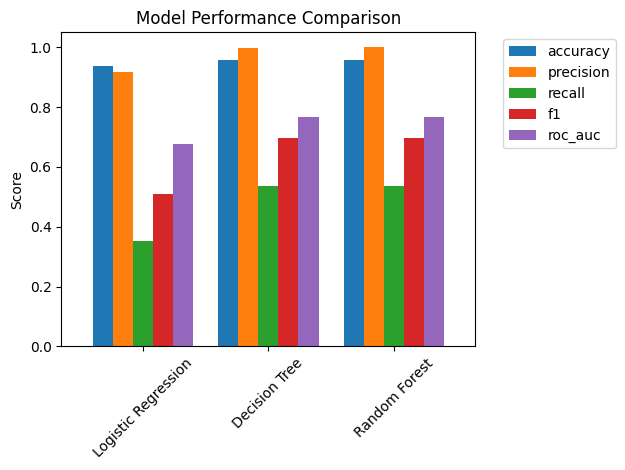

In [8]:
model_metrics = {
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
    }
model_comparison = compare_model(model_metrics)

#### Conclusion
From the model comparison, we observe that the Decision Tree and Random Forest models outperform Logistic Regression across most metrics. While Logistic Regression achieves a high accuracy of 93.68%, its recall (35.37%) and F1-score (51.04%) indicate poor performance in identifying the positive class.

Both Decision Tree and Random Forest achieve similar accuracy (95.67% and 95.68%) and recall (53.60%), with Random Forest having a slight edge in precision and ROC-AUC. Random Forest achieves a perfect precision of 100%, slightly higher F1-score (69.79%), and the best ROC-AUC (76.79%), indicating better overall performance.

#### Model Selection: 
Given the trade-offs, Random Forest is the best choice as it offers the highest precision, recall, and F1-score while maintaining strong accuracy and AUC. It is also more robust and generalizes better than a single Decision Tree.